In [6]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Load MATLAB files
print("Loading data...")
rf_data = sio.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')
psf_data = sio.loadmat('exp/datasets/Besson_Data/psf_pw_est_carotid_fr.mat')

rf = rf_data['raw_data'].astype(np.float64)
psf = psf_data['psf_est'].astype(np.float64)
psf = psf / np.sum(np.abs(psf))  # L1 normalization

print(f"RF data shape: {rf.shape}")
print(f"PSF shape: {psf.shape}")

Loading data...
RF data shape: (1864, 128)
PSF shape: (53, 53)


In [2]:
import scipy.io
data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'h', 'raw_data'])


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import scipy.io

# Load the data
data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')
rf = rf_data['raw_data'].astype(np.float64)
print('RF shape:', rf.shape)
print('RF range: min =', np.min(rf), ', max =', np.max(rf))

RF shape: (1864, 128)
RF range: min = -16384.0 , max = 16384.0


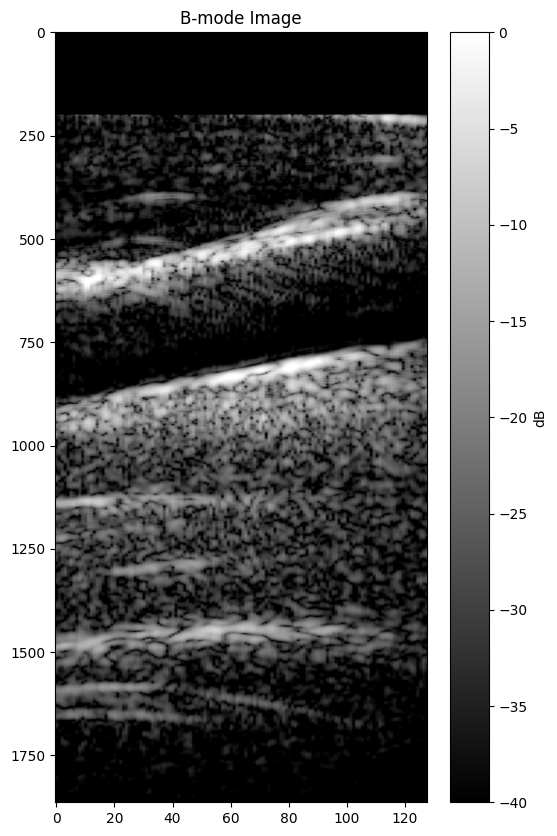

In [9]:
# Normalize RF data to [-1, 1]
rf_norm = rf / np.max(np.abs(rf))

# Envelope detection using Hilbert transform
env = np.abs(hilbert(rf_norm, axis=0))

# Log compression for B-mode image
bmode = 20 * np.log10(env + 1e-6)  # add epsilon to avoid log(0)

# Optional: clip dynamic range for display (e.g., -40 to 0 dB)
bmode_display = np.clip(bmode, -40, 0)

# Display the B-mode image
plt.figure(figsize=(6, 10))
plt.imshow(bmode_display, cmap='gray', aspect='auto')
plt.title('B-mode Image')
plt.axis('on')
plt.colorbar(label='dB')
plt.show()


RF shape: (1864, 128)
(1664, 128)


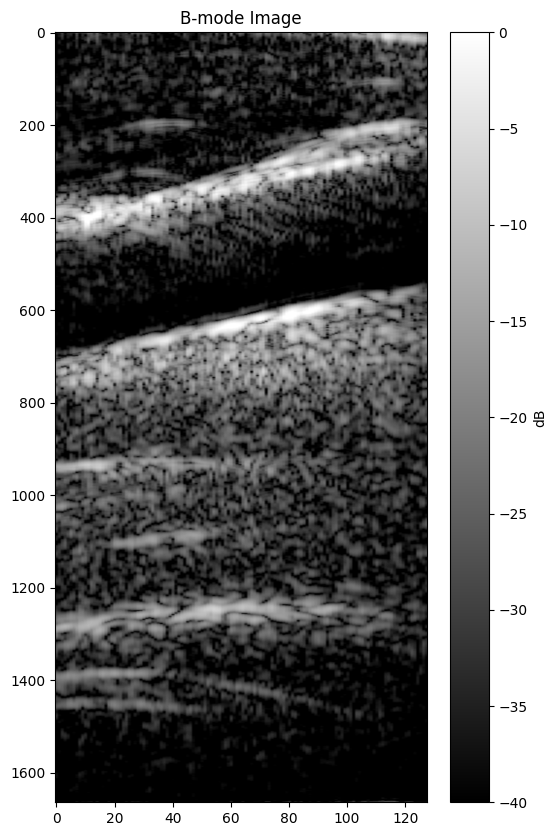

In [19]:
import numpy as np
import scipy.io
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Load the .mat file
rf = rf_data['raw_data'].astype(np.float64)
print('RF shape:', rf.shape)



# Extract 512 rows starting from index 1000
rf_section = rf[200:, :]

print(rf_section.shape)

# Normalize RF data to [-1, 1]
rf_norm = rf_section / np.max(np.abs(rf_section))

# Envelope detection using Hilbert transform
env = np.abs(hilbert(rf_norm, axis=0))

# Log compression for B-mode image
bmode = 20 * np.log10(env + 1e-6)  # add epsilon to avoid log(0)

# Optional: clip dynamic range for display (e.g., -40 to 0 dB)
bmode_display = np.clip(bmode, -40, 0)

# Display the B-mode image
plt.figure(figsize=(6, 10))
plt.imshow(bmode_display, cmap='gray', aspect='auto')
plt.title('B-mode Image')
plt.axis('on')
plt.colorbar(label='dB')
plt.show()




In [24]:
import numpy as np
from skimage.io import imsave, imread
from skimage import img_as_float
import imresize

new_img_double = imresize(rf_section, output_shape=(512, 512))
# Normalize RF data to [-1, 1]
rf_norm = new_img_double / np.max(np.abs(new_img_double))

# Envelope detection using Hilbert transform
env = np.abs(hilbert(rf_norm, axis=0))

# Log compression for B-mode image
bmode = 20 * np.log10(env + 1e-6)  # add epsilon to avoid log(0)

# Optional: clip dynamic range for display (e.g., -40 to 0 dB)
bmode_display = np.clip(bmode, -40, 0)

# Display the B-mode image
plt.figure(figsize=(6, 10))
plt.imshow(bmode_display, cmap='gray', aspect='auto')
plt.title('B-mode Image')
plt.axis('on')
plt.colorbar(label='dB')
plt.show()


TypeError: 'module' object is not callable

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import scipy.io

# Load the data
data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')

# Extract RF data (fix the variable name)
rf = data['raw_data'].astype(np.float64)

print('RF shape:', rf.shape)
print('RF range: min =', np.min(rf), ', max =', np.max(rf))

# Normalize RF data to [-1, 1]
rf_norm = rf / np.max(np.abs(rf))

print('Normalized RF range: min =', np.min(rf_norm), ', max =', np.max(rf_norm))

RF shape: (1864, 128)
RF range: min = -16384.0 , max = 16384.0
Normalized RF range: min = -1.0 , max = 1.0


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.ndimage import zoom
import scipy.io

# Load the data
data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')

# Extract RF data
rf = data['raw_data'].astype(np.float64)

print('Original RF shape:', rf.shape)
print('Original RF range: min =', np.min(rf), ', max =', np.max(rf))

# Resize to 512x512
target_shape = (512, 512)
current_shape = rf.shape

# Calculate zoom factors for each dimension
zoom_factors = [target_shape[i] / current_shape[i] for i in range(len(current_shape))]

# Resize using scipy.ndimage.zoom (preserves signal characteristics better than simple interpolation)
rf_resized = zoom(rf, zoom_factors, order=1)  # order=1 for bilinear interpolation

print('Resized RF shape:', rf_resized.shape)
print('Resized RF range: min =', np.min(rf_resized), ', max =', np.max(rf_resized))

# Now normalize the resized data to [-1, 1]
rf_norm = rf_resized / np.max(np.abs(rf_resized))

print('Normalized RF range: min =', np.min(rf_norm), ', max =', np.max(rf_norm))

Original RF shape: (1864, 128)
Original RF range: min = -16384.0 , max = 16384.0
Resized RF shape: (512, 512)
Resized RF range: min = -15774.925938550368 , max = 15653.785968956588
Normalized RF range: min = -1.0 , max = 0.9923207265716703


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.ndimage import zoom
import scipy.io

# Load the data
data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')
rf = data['raw_data'].astype(np.float64)

print('Original RF shape:', rf.shape)
print('Original RF range: min =', np.min(rf), ', max =', np.max(rf))

# Resize to 512x512
target_shape = (512, 512)
current_shape = rf_section.shape
zoom_factors = [target_shape[i] / current_shape[i] for i in range(len(current_shape))]
#rf_resized = zoom(rf_section, zoom_factors, order=1)
rf_resized = rf_section.resize(512, 512)

print('Resized RF shape:', rf_resized.shape)
print('Resized RF range: min =', np.min(rf_resized), ', max =', np.max(rf_resized))

# Normalize both original and resized RF data
rf_orig_norm = rf / np.max(np.abs(rf))
rf_resized_norm = rf_resized / np.max(np.abs(rf_resized))

print('Original normalized RF range: min =', np.min(rf_orig_norm), ', max =', np.max(rf_orig_norm))
print('Resized normalized RF range: min =', np.min(rf_resized_norm), ', max =', np.max(rf_resized_norm))

# Function to create B-mode image
def create_bmode(rf_data):
    # Envelope detection using Hilbert transform
    env = np.abs(hilbert(rf_data, axis=0))
    # Log compression for B-mode image
    bmode = 20 * np.log10(env + 1e-6)  # add epsilon to avoid log(0)
    # Clip dynamic range for display (e.g., -40 to 0 dB)
    bmode_display = np.clip(bmode, -40, 0)
    return bmode_display

# Create B-mode images for both
bmode_orig = create_bmode(rf_orig_norm)
bmode_resized = create_bmode(rf_resized_norm)

# Display both side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Original B-mode
im1 = ax1.imshow(bmode_display, cmap='gray', aspect='auto')
ax1.set_title(f'Original B-mode\nShape: {bmode_orig.shape}')
ax1.set_xlabel('Lateral (samples)')
ax1.set_ylabel('Axial (samples)')
plt.colorbar(im1, ax=ax1, label='dB', shrink=0.8)

# Resized B-mode
im2 = ax2.imshow(bmode_resized, cmap='gray', aspect='auto')
ax2.set_title(f'Resized B-mode\nShape: {bmode_resized.shape}')
ax2.set_xlabel('Lateral (samples)')
ax2.set_ylabel('Axial (samples)')
plt.colorbar(im2, ax=ax2, label='dB', shrink=0.8)

plt.tight_layout()
plt.show()

# Optional: Display statistics comparison
print("\nB-mode Statistics:")
print(f"Original B-mode - Min: {np.min(bmode_orig):.2f} dB, Max: {np.max(bmode_orig):.2f} dB")
print(f"Resized B-mode - Min: {np.min(bmode_resized):.2f} dB, Max: {np.max(bmode_resized):.2f} dB")

Original RF shape: (1864, 128)
Original RF range: min = -16384.0 , max = 16384.0


ValueError: resize only works on single-segment arrays

In [24]:
import scipy.io as sio
import numpy as np   # only needed if you want to check dtype / shape

# --- rf_resized_norm is your (512,512) NumPy array in float32/float64 ---
print(rf_resized_norm.shape, rf_resized_norm.dtype)   # optional sanity-check

# Save to a .mat file (v7.3 if the array is large, but v5 is fine here)
sio.savemat('exp/datasets/Besson_Data/rf_resized_norm.mat', {'data': rf_resized_norm})

(512, 512) float64


In [25]:
loaded = sio.loadmat('exp/datasets/Besson_Data/rf_resized_norm.mat')
rf_loaded = loaded['data']
print(rf_loaded.shape, rf_loaded.dtype)


(512, 512) float64


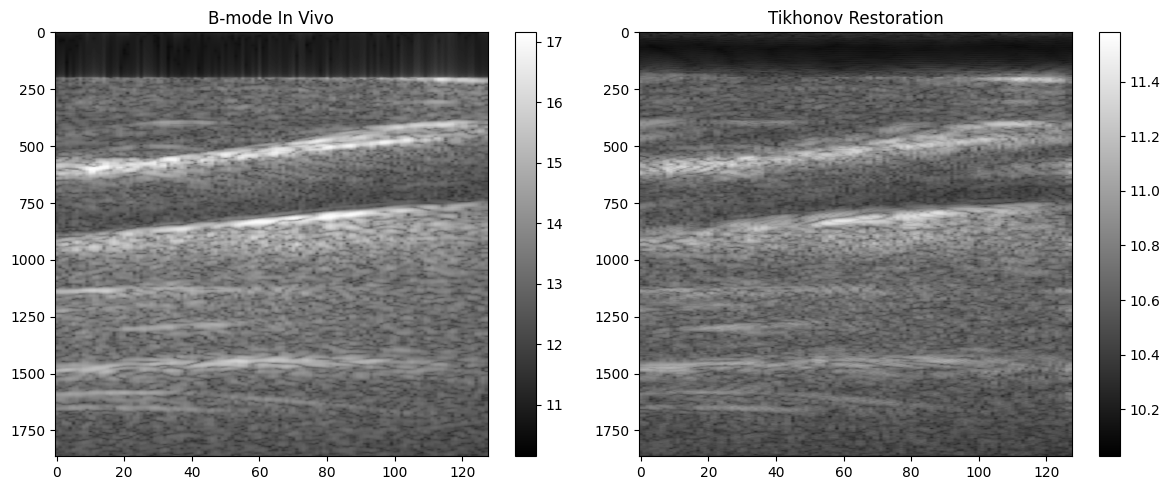

In [26]:
import numpy as np
import scipy.io
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Load the RF data and the estimated PSF
rf_data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')['raw_data'].astype(np.float64)
psf_data = scipy.io.loadmat('exp/datasets/Besson_Data/psf_pw_est_carotid_fr.mat')['psf_est'].astype(np.float64)

# Normalize RF
rfn = rf_data / np.max(np.abs(rf_data))

# Normalize PSF
H = psf_data / np.sum(np.abs(psf_data))

# Create the D matrix (BCCB form in Fourier domain)
Mh, Nh = H.shape
Mrf, Nrf = rf_data.shape
center = [Mh // 2, Nh // 2]

# Pad PSF to the size of RF and shift the center
pad_height = Mrf - Mh
pad_width = Nrf - Nh
H_padded = np.pad(H, ((0, pad_height), (0, pad_width)), mode='constant')
H_shifted = np.roll(H_padded, shift=(1 - center[0], 1 - center[1]), axis=(0, 1))

# FFT of the padded and shifted PSF
D = np.fft.fft2(H_shifted)

# Tikhonov restoration (Wiener filtering)
SNR = 1000  # corresponds to ~30 dB
R = np.fft.fft2(rfn)
VivoTK = np.fft.ifft2(R * np.conj(D) / (1/SNR + np.conj(D)*D)).real

# B-mode display: In Vivo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(hilbert(rf_data, axis=0))**0.2 + 10, cmap='gray', aspect='auto')
plt.title('B-mode In Vivo')
plt.axis('on')
plt.colorbar()

# B-mode display: Tikhonov Restoration
plt.subplot(1, 2, 2)
plt.imshow(np.abs(VivoTK)**0.2 + 10, cmap='gray', aspect='auto')
plt.title('Tikhonov Restoration')
plt.axis('on')
plt.colorbar()

plt.tight_layout()
plt.show()


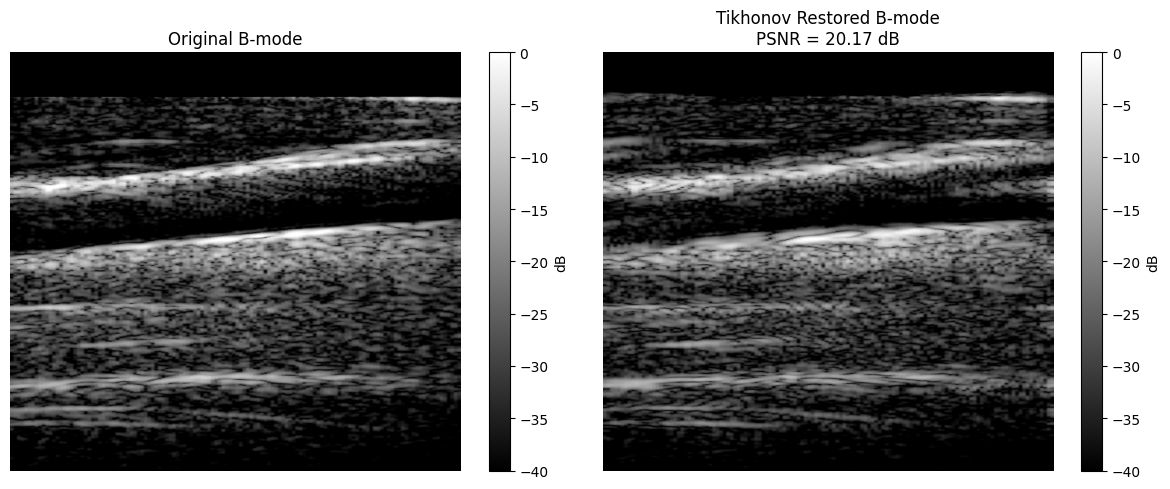

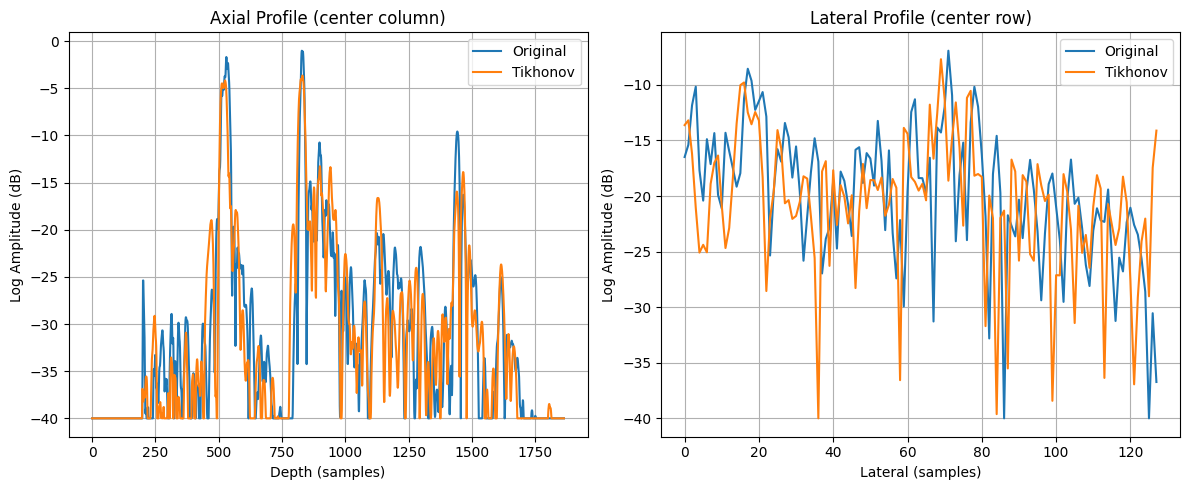

In [37]:
import numpy as np
import scipy.io
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load RF data and PSF
rf_data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')['raw_data'].astype(np.float64)
psf_data = scipy.io.loadmat('exp/datasets/Besson_Data/psf_pw_est_carotid_fr.mat')['psf_est'].astype(np.float64)

# Clone for processing
rf = rf_data.copy()
H = psf_data.copy()

# Prepare PSF in frequency domain
Mh, Nh = H.shape
center = np.round(np.array([Mh, Nh]) / 2).astype(int)
H_padded = np.pad(H, ((0, rf.shape[0] - Mh), (0, rf.shape[1] - Nh)), mode='constant')
shift = 1 - center
H_shifted = np.roll(H_padded, shift, axis=(0, 1))
D = np.fft.fft2(H_shifted)

# Apply Tikhonov Deconvolution
SNR = 2000  # ~20 dB
rfn = rf / np.max(np.abs(rf))
VivoTK = np.real(np.fft.ifft2(np.fft.fft2(rfn) * np.conj(D) / (SNR**(-1) + np.conj(D) * D)))
VivoTK = VivoTK / np.max(np.abs(VivoTK))  # normalize restored output

# Envelope and log-compressed B-mode
def to_bmode(rf_data):
    envelope = np.abs(hilbert(rf_data, axis=0))
    bmode = 20 * np.log10(envelope + 1e-6)
    return np.clip(bmode, -40, 0)

bmode_orig = to_bmode(rfn)
bmode_tikh = to_bmode(VivoTK)

# Compute PSNR
mse = mean_squared_error(rfn.flatten(), VivoTK.flatten())
psnr = 10 * np.log10(1.0 / (mse + 1e-12))

# Plot B-mode images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(bmode_orig, cmap='gray', aspect='auto', vmin=-40, vmax=0)
plt.title('Original B-mode')
plt.axis('off')
plt.colorbar(label='dB')

plt.subplot(1, 2, 2)
plt.imshow(bmode_tikh, cmap='gray', aspect='auto', vmin=-40, vmax=0)
plt.title(f'Tikhonov Restored B-mode\nPSNR = {psnr:.2f} dB')
plt.axis('off')
plt.colorbar(label='dB')
plt.tight_layout()
plt.show()

# Profile comparison (axial & lateral)
center_line = rf.shape[1] // 2
center_depth = rf.shape[0] // 2

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(bmode_orig[:, center_line], label='Original', linewidth=1.5)
plt.plot(bmode_tikh[:, center_line], label='Tikhonov', linewidth=1.5)
plt.title('Axial Profile (center column)')
plt.xlabel('Depth (samples)')
plt.ylabel('Log Amplitude (dB)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bmode_orig[center_depth, :], label='Original', linewidth=1.5)
plt.plot(bmode_tikh[center_depth, :], label='Tikhonov', linewidth=1.5)
plt.title('Lateral Profile (center row)')
plt.xlabel('Lateral (samples)')
plt.ylabel('Log Amplitude (dB)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


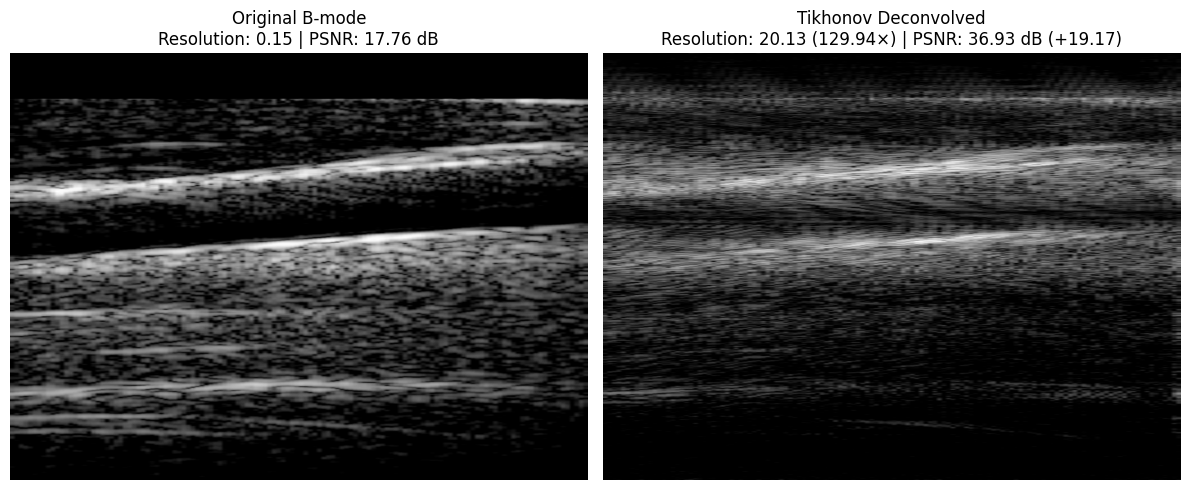

In [39]:
import numpy as np
import scipy.io as sio
from scipy.signal import hilbert, convolve2d, find_peaks
from scipy.ndimage import gaussian_filter
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
import pywt

# Load RF and PSF
rf_mat = sio.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')
psf_mat = sio.loadmat('exp/datasets/Besson_Data/psf_pw_est_carotid_fr.mat')
rf = rf_mat['raw_data'].astype(np.float64)
psf = psf_mat['psf_est'].astype(np.float64)

# Normalize RF and PSF
rfn = rf / np.max(np.abs(rf))
psf = psf / np.sqrt(np.sum(np.abs(psf)**2))

# Estimate noise level
coeffs = pywt.wavedec2(rfn, 'db1', level=1)
detail_coeffs = np.hstack([c.ravel() for c in coeffs[1]])
noise_std = np.median(np.abs(detail_coeffs)) / 0.6745

# Pad and shift PSF to center
Mr, Nr = rfn.shape
Mh, Nh = psf.shape
psf_padded = np.zeros((Mr, Nr))
start_r, start_c = Mr//2 - Mh//2, Nr//2 - Nh//2
psf_padded[start_r:start_r+Mh, start_c:start_c+Nh] = psf
H = fft2(ifftshift(psf_padded))
H_conj = np.conj(H)
RF_freq = fft2(rfn)

# Grid search over lambda
lambda_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
resolution_scores, psnr_scores = [], []

def resolution_metric(image):
    env = np.abs(hilbert(image, axis=0))
    # Edge sharpness
    sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y = sobel_x.T
    edge_x = convolve2d(env, sobel_x, mode='same')
    edge_y = convolve2d(env, sobel_y, mode='same')
    edge_mag = np.sqrt(edge_x**2 + edge_y**2)
    sharpness = np.std(edge_mag)
    # Texture
    local_mean = gaussian_filter(env, sigma=1)
    texture = np.mean((env - local_mean)**2)
    # High-frequency content
    freq = fftshift(fft2(env))
    rows, cols = freq.shape
    Y, X = np.ogrid[:rows, :cols]
    center_r, center_c = rows//2, cols//2
    dist = np.sqrt((X - center_c)**2 + (Y - center_r)**2)
    mask = (dist > 0.4 * center_r) & (dist < 0.8 * center_r)
    freq_ratio = np.sum(np.abs(freq[mask])**2) / (np.sum(np.abs(freq)**2) + 1e-6)
    return sharpness * 0.4 + texture * 1000 * 0.4 + freq_ratio * 100 * 0.2

for lam in lambda_values:
    W = H_conj / (np.abs(H)**2 + lam)
    result = np.real(ifft2(RF_freq * W))
    res_score = resolution_metric(result)
    psnr = 10 * np.log10(np.var(result) / noise_std**2)
    resolution_scores.append(res_score)
    psnr_scores.append(psnr)

# Optimal lambda
scores = np.array(resolution_scores) + 0.1 * (np.array(psnr_scores) - min(psnr_scores))
best_idx = np.argmax(scores)
opt_lambda = lambda_values[best_idx]

# Final deconvolution
W_opt = H_conj / (np.abs(H)**2 + opt_lambda)
result_opt = np.real(ifft2(RF_freq * W_opt))

# PSNR and resolution gain
orig_res = resolution_metric(rfn)
final_res = resolution_metric(result_opt)
res_gain = final_res / orig_res
psnr_orig = 10 * np.log10(np.var(rfn) / noise_std**2)
psnr_final = 10 * np.log10(np.var(result_opt) / noise_std**2)
psnr_gain = psnr_final - psnr_orig

# Generate B-mode
def bmode(rf_data):
    env = np.abs(hilbert(rf_data, axis=0))
    env = env / np.max(env)
    log_env = 20 * np.log10(env + 1e-6)
    return np.clip(log_env, -40, 0)

bmode_orig = bmode(rfn)
bmode_rest = bmode(result_opt)

# Show results
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(bmode_orig, cmap='gray', aspect='auto', vmin=-40, vmax=0)
plt.title(f"Original B-mode\nResolution: {orig_res:.2f} | PSNR: {psnr_orig:.2f} dB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(bmode_rest, cmap='gray', aspect='auto', vmin=-40, vmax=0)
plt.title(f"Tikhonov Deconvolved\nResolution: {final_res:.2f} ({res_gain:.2f}×) | PSNR: {psnr_final:.2f} dB (+{psnr_gain:.2f})")
plt.axis('off')
plt.tight_layout()
plt.show()


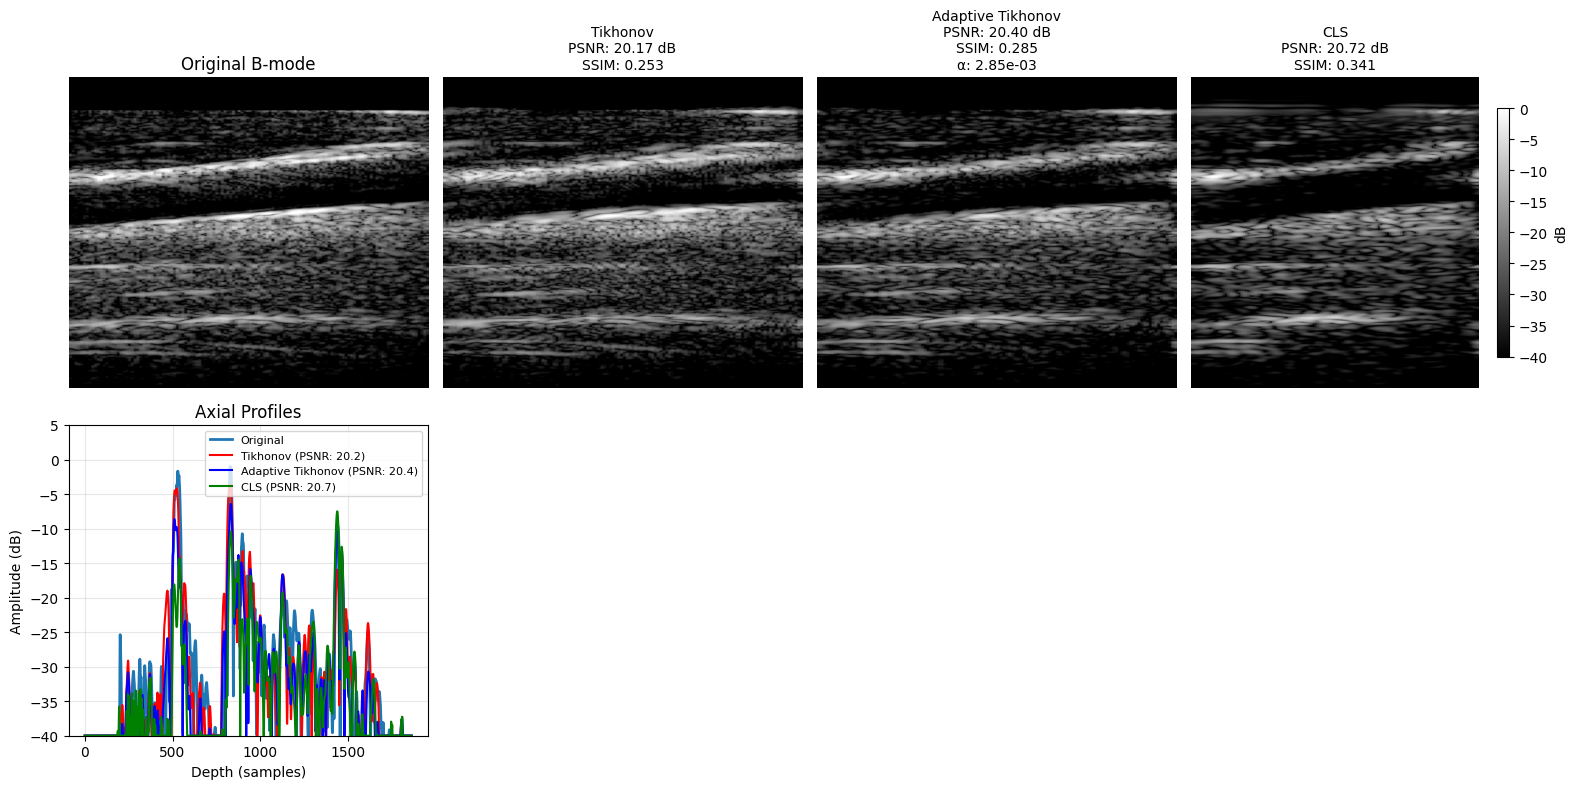


DECONVOLUTION METHODS COMPARISON

Tikhonov:
  PSNR: 20.17 dB
  SSIM: 0.2531
  CNR Improvement: -0.92 dB

Adaptive Tikhonov:
  PSNR: 20.40 dB
  SSIM: 0.2852
  CNR Improvement: -0.55 dB
  Optimal α: 2.85e-03

CLS:
  PSNR: 20.72 dB
  SSIM: 0.3414
  CNR Improvement: -1.39 dB


In [42]:
import numpy as np
import scipy.io
from scipy.signal import hilbert, wiener
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
try:
    from skimage.metrics import structural_similarity as ssim
except ImportError:
    # Fallback if skimage is not available
    def ssim(img1, img2, data_range=None):
        # Simple correlation-based similarity metric as fallback
        img1_flat = img1.flatten()
        img2_flat = img2.flatten()
        correlation = np.corrcoef(img1_flat, img2_flat)[0, 1]
        return correlation if not np.isnan(correlation) else 0.0

class UltrasoundDeconvolution:
    def __init__(self, rf_data, psf_data):
        self.rf_original = rf_data.astype(np.float64)
        self.psf = psf_data.astype(np.float64)
        self.rf_normalized = self.rf_original / np.max(np.abs(self.rf_original))
        
    def prepare_psf(self):
        """Prepare PSF for frequency domain operations"""
        Mh, Nh = self.psf.shape
        Mr, Nr = self.rf_normalized.shape
        
        # Center and pad PSF
        center = np.round(np.array([Mh, Nh]) / 2).astype(int)
        H_padded = np.pad(self.psf, ((0, Mr - Mh), (0, Nr - Nh)), mode='constant')
        shift = 1 - center
        H_shifted = np.roll(H_padded, shift, axis=(0, 1))
        
        return np.fft.fft2(H_shifted)
    
    def tikhonov_deconv(self, snr=2000):
        """Tikhonov regularized deconvolution"""
        D = self.prepare_psf()
        alpha = snr**(-1)  # Regularization parameter
        
        RF_freq = np.fft.fft2(self.rf_normalized)
        deconv_freq = RF_freq * np.conj(D) / (alpha + np.conj(D) * D)
        
        return np.real(np.fft.ifft2(deconv_freq))
    
    def adaptive_tikhonov(self):
        """Adaptive Tikhonov with optimal regularization parameter"""
        def objective(log_alpha):
            alpha = 10**log_alpha
            D = self.prepare_psf()
            RF_freq = np.fft.fft2(self.rf_normalized)
            deconv_freq = RF_freq * np.conj(D) / (alpha + np.conj(D) * D)
            result = np.real(np.fft.ifft2(deconv_freq))
            
            # L-curve criterion approximation
            residual_norm = np.linalg.norm(self.rf_normalized - 
                                         np.real(np.fft.ifft2(np.fft.fft2(result) * D)))
            solution_norm = np.linalg.norm(result)
            
            return residual_norm + alpha * solution_norm**2
        
        # Find optimal regularization parameter
        result = minimize_scalar(objective, bounds=(-6, -1), method='bounded')
        optimal_alpha = 10**result.x
        
        # Apply with optimal parameter
        D = self.prepare_psf()
        RF_freq = np.fft.fft2(self.rf_normalized)
        deconv_freq = RF_freq * np.conj(D) / (optimal_alpha + np.conj(D) * D)
        
        return np.real(np.fft.ifft2(deconv_freq)), optimal_alpha
    
    def constrained_least_squares(self, gamma=0.01):
        """Constrained Least Squares deconvolution"""
        D = self.prepare_psf()
        
        # Laplacian operator for smoothness constraint
        laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
        L_padded = np.zeros_like(self.rf_normalized)
        L_padded[:3, :3] = laplacian
        L_freq = np.fft.fft2(L_padded)
        
        RF_freq = np.fft.fft2(self.rf_normalized)
        deconv_freq = RF_freq * np.conj(D) / (np.conj(D) * D + gamma * np.conj(L_freq) * L_freq)
        
        return np.real(np.fft.ifft2(deconv_freq))
    
    def to_bmode(self, rf_data, dynamic_range=40):
        """Convert RF to B-mode with customizable dynamic range"""
        envelope = np.abs(hilbert(rf_data, axis=0))
        bmode = 20 * np.log10(envelope + 1e-6)
        return np.clip(bmode, -dynamic_range, 0)
    
    def compute_metrics(self, original, restored):
        """Compute comprehensive quality metrics"""
        # Normalize for fair comparison
        orig_norm = original / np.max(np.abs(original))
        rest_norm = restored / np.max(np.abs(restored))
        
        # MSE and PSNR
        mse = mean_squared_error(orig_norm.flatten(), rest_norm.flatten())
        psnr = 10 * np.log10(1.0 / (mse + 1e-12))
        
        # SSIM for B-mode images
        bmode_orig = self.to_bmode(orig_norm)
        bmode_rest = self.to_bmode(rest_norm)
        ssim_val = ssim(bmode_orig, bmode_rest, data_range=40)
        
        # Contrast-to-noise ratio improvement
        cnr_orig = self.compute_cnr(bmode_orig)
        cnr_rest = self.compute_cnr(bmode_rest)
        cnr_improvement = cnr_rest - cnr_orig
        
        return {
            'mse': mse,
            'psnr': psnr,
            'ssim': ssim_val,
            'cnr_improvement': cnr_improvement
        }
    
    def compute_cnr(self, bmode_image):
        """Compute Contrast-to-Noise Ratio"""
        # Simple ROI-based CNR (you might want to customize this)
        h, w = bmode_image.shape
        center_roi = bmode_image[h//3:2*h//3, w//3:2*w//3]
        background_roi = bmode_image[:h//4, :w//4]
        
        signal_mean = np.mean(center_roi)
        background_mean = np.mean(background_roi)
        noise_std = np.std(background_roi)
        
        return abs(signal_mean - background_mean) / (noise_std + 1e-6)
    
    def compare_methods(self):
        """Compare different deconvolution methods"""
        methods = {}
        
        # Standard Tikhonov
        methods['Tikhonov'] = self.tikhonov_deconv()
        
        # Adaptive Tikhonov
        adaptive_result, optimal_alpha = self.adaptive_tikhonov()
        methods['Adaptive Tikhonov'] = adaptive_result
        
        # Constrained Least Squares
        methods['CLS'] = self.constrained_least_squares()
        
        # Compute metrics for each method
        results = {}
        for name, result in methods.items():
            metrics = self.compute_metrics(self.rf_normalized, result)
            results[name] = {
                'image': result,
                'metrics': metrics
            }
        
        # Add optimal alpha info for adaptive method
        if 'Adaptive Tikhonov' in results:
            results['Adaptive Tikhonov']['optimal_alpha'] = optimal_alpha
        
        return results
    
    def plot_comparison(self, results):
        """Plot comprehensive comparison of methods"""
        n_methods = len(results)
        fig, axes = plt.subplots(2, n_methods + 1, figsize=(4 * (n_methods + 1), 8))
        
        # Original image
        bmode_orig = self.to_bmode(self.rf_normalized)
        axes[0, 0].imshow(bmode_orig, cmap='gray', aspect='auto', vmin=-40, vmax=0)
        axes[0, 0].set_title('Original B-mode')
        axes[0, 0].axis('off')
        
        # Profile plots setup
        center_line = self.rf_normalized.shape[1] // 2
        axes[1, 0].plot(bmode_orig[:, center_line], label='Original', linewidth=2)
        axes[1, 0].set_title('Axial Profiles')
        axes[1, 0].set_xlabel('Depth (samples)')
        axes[1, 0].set_ylabel('Amplitude (dB)')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Results for each method
        colors = ['red', 'blue', 'green', 'orange', 'purple']
        for i, (name, result_data) in enumerate(results.items()):
            result = result_data['image']
            metrics = result_data['metrics']
            
            # Normalize result
            result_norm = result / np.max(np.abs(result))
            bmode_result = self.to_bmode(result_norm)
            
            # B-mode image
            im = axes[0, i + 1].imshow(bmode_result, cmap='gray', aspect='auto', vmin=-40, vmax=0)
            title = f'{name}\nPSNR: {metrics["psnr"]:.2f} dB\nSSIM: {metrics["ssim"]:.3f}'
            if 'optimal_alpha' in result_data:
                title += f'\nα: {result_data["optimal_alpha"]:.2e}'
            axes[0, i + 1].set_title(title, fontsize=10)
            axes[0, i + 1].axis('off')
            
            # Add colorbar to last image
            if i == len(results) - 1:
                plt.colorbar(im, ax=axes[0, i + 1], label='dB', shrink=0.8)
            
            # Profile comparison
            axes[1, 0].plot(bmode_result[:, center_line], 
                           label=f'{name} (PSNR: {metrics["psnr"]:.1f})', 
                           linewidth=1.5, color=colors[i % len(colors)])
        
        axes[1, 0].legend(fontsize=8)
        axes[1, 0].set_ylim([-40, 5])
        
        # Remove empty subplots
        for j in range(1, n_methods + 1):
            axes[1, j].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Print metrics summary
        print("\n" + "="*60)
        print("DECONVOLUTION METHODS COMPARISON")
        print("="*60)
        for name, result_data in results.items():
            metrics = result_data['metrics']
            print(f"\n{name}:")
            print(f"  PSNR: {metrics['psnr']:.2f} dB")
            print(f"  SSIM: {metrics['ssim']:.4f}")
            print(f"  CNR Improvement: {metrics['cnr_improvement']:.2f} dB")
            if 'optimal_alpha' in result_data:
                print(f"  Optimal α: {result_data['optimal_alpha']:.2e}")

# Usage example
if __name__ == "__main__":
    # Load your data (replace with actual file paths)
    try:
        rf_data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')['raw_data']
        psf_data = scipy.io.loadmat('exp/datasets/Besson_Data/psf_pw_est_carotid_fr.mat')['psf_est']
        
        # Create deconvolution object
        deconv = UltrasoundDeconvolution(rf_data, psf_data)
        
        # Compare different methods
        results = deconv.compare_methods()
        
        # Plot comprehensive comparison
        deconv.plot_comparison(results)
        
    except FileNotFoundError:
        print("Data files not found. Please ensure the MATLAB files are in the correct path.")
        print("This is a template showing the enhanced deconvolution methods.")

In [40]:
!pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [44]:
import numpy as np
import scipy.io
import pywt

# Load the RF data from uploaded file
rf_data = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')['raw_data'].astype(np.float64)

# Perform a 2D wavelet decomposition at the finest scale (level=1)
wavelet = 'db1'  # Daubechies 1 wavelet (Haar)
coeffs = pywt.wavedec2(rf_data, wavelet, level=1)

# Extract detail coefficients: horizontal, vertical, and diagonal
cH, cV, cD = coeffs[1]

# Flatten and concatenate all detail coefficients
detail_coeffs = np.concatenate([cH.ravel(), cV.ravel(), cD.ravel()])

# Median Absolute Deviation (MAD)-based noise estimation
median_val = np.median(np.abs(detail_coeffs))
sigma_est = median_val / 0.6745

# Convert estimated noise to decibels
sigma_db = 20 * np.log10(sigma_est)

sigma_est, sigma_db


(150.48183839881398, 43.549681764826175)

In [45]:
# Using your noise estimation for adaptive deconvolution
sigma_est = 150.48  # From your wavelet analysis

# Calculate signal power
signal_power = np.sqrt(np.mean(rf_data**2))

# Optimal SNR for Tikhonov regularization
optimal_snr = (signal_power / sigma_est)**2

print(f"Recommended SNR for deconvolution: {optimal_snr:.0f}")

Recommended SNR for deconvolution: 60


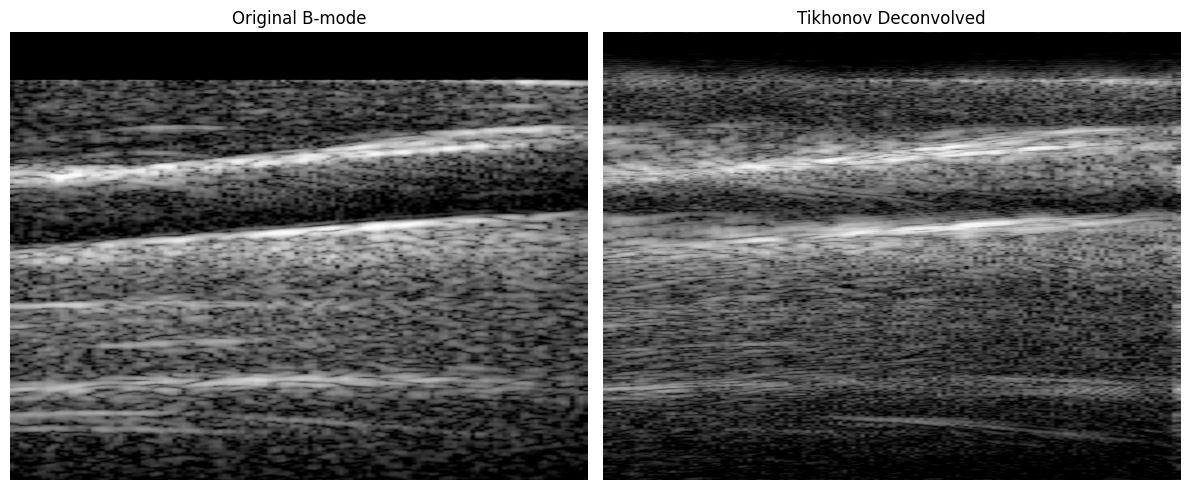

In [4]:
import numpy as np
import scipy.io
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Load RF and PSF data
rf = scipy.io.loadmat('exp/datasets/Besson_Data/L12-50-50mm_caro_5MHz_fr_dte.mat')['raw_data'].astype(np.float64)
psf = scipy.io.loadmat('exp/datasets/Besson_Data/psf_pw_est_carotid_fr.mat')['psf_est'].astype(np.float64)

# Normalize RF and PSF
rfn = rf / np.max(np.abs(rf))
psf = psf / np.sqrt(np.sum(psf**2))

# Pad PSF to match RF size and shift center
Mr, Nr = rfn.shape
Mh, Nh = psf.shape
psf_padded = np.zeros((Mr, Nr))
start_r, start_c = Mr//2 - Mh//2, Nr//2 - Nh//2
psf_padded[start_r:start_r+Mh, start_c:start_c+Nh] = psf
H = fft2(ifftshift(psf_padded))
H_conj = np.conj(H)
RF_freq = fft2(rfn)

# Choose regularization (based on noise level or test)
SNR = 60.0  # you can replace this with sigma_est if needed
lam = 1 / SNR**2

# Tikhonov filter (Wiener solution)
W = H_conj / (np.abs(H)**2 + lam)
result = np.real(ifft2(RF_freq * W))

# Envelope + log compression
def bmode(rf_data):
    env = np.abs(hilbert(rf_data, axis=0))
    env = env / np.max(env)
    log_env = 20 * np.log10(env + 1e-6)
    return np.clip(log_env, -50, 0)

bmode_orig = bmode(rfn)
bmode_tikh = bmode(result)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(bmode_orig, cmap='gray', aspect='auto')
plt.title("Original B-mode")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bmode_tikh, cmap='gray', aspect='auto')
plt.title("Tikhonov Deconvolved")
plt.axis('off')

plt.tight_layout()
plt.show()


In [88]:
folder_name = "Besson"

In [156]:
!python main.py --ni --config deblur_besson.yml --doc imagenet_ood --timesteps 40 --eta 0.85 --etaB 1 --deg deblur_bccb --sigma_0 10 -i {folder_name}

Module path: /projects/minds/PDAS-M2-2025/DDPM
Current sys.path: ['/projects/minds/PDAS-M2-2025/Stable_DDRM', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/home/pdas/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/nvfuser-0.1.4a0+d0bb811-py3.10-linux-x86_64.egg', '/usr/lib/python3/dist-packages', '/projects/minds/PDAS-M2-2025/DDPM']
File not found: /projects/minds/PDAS-M2-2025/DDPM/denoising_diffusion_pytorch.py
Import failed: No module named 'denoising_diffusion_pytorch'
INFO - main.py - 2025-06-19 18:29:16,724 - Using device: cuda
INFO - main.py - 2025-06-19 18:29:16,725 - Writing log file to exp/logs/imagenet_ood
INFO - main.py - 2025-06-19 18:29:16,725 - Exp instance id = 235926
INFO - main.py - 2025-06-19 18:29:16,725 - Exp comment = 
building dataset from exp/BessonData.txt
read meta done
Start from 0
  0%|                                                     | 0/1 [00

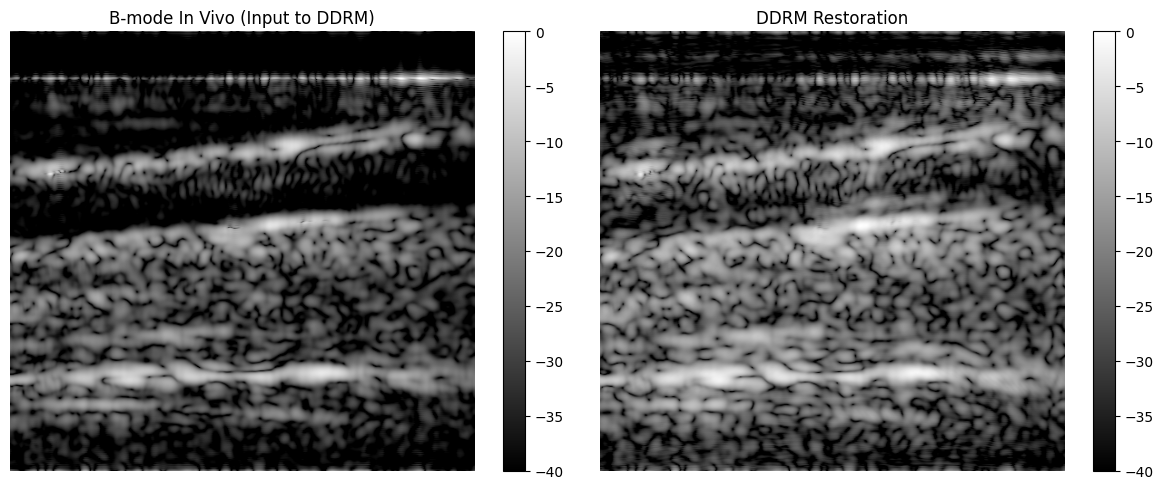

In [158]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# ─────────────── Load and Process RF Data ───────────────
data = scipy.io.loadmat('exp/datasets/Besson_Data/rf_resized_norm.mat')
rf = data['data'].astype(np.float64)

# Compute log-compressed B-mode for RF
bmode_rf = np.abs(hilbert(rf, axis=0))**0.2 + 10

# ─────────────── Load and Process DDRM Result ───────────────
mat_res = scipy.io.loadmat('exp/image_samples/Besson/0_-1.mat')
img_res = mat_res['image']
if img_res.ndim == 3 and img_res.shape[0] in (1, 3):
    img_res = np.transpose(img_res, (1, 2, 0))
grayimage = np.mean(img_res, axis=2) if img_res.ndim == 3 else img_res

# Envelope + log compression
def bmode(rf_data):
    env = np.abs(hilbert(rf_data, axis=0))
    env = env / np.max(env)
    log_env = 20 * np.log10(env + 1e-6)
    return np.clip(log_env, -40, 0)

# Compute B-mode for DDRM output
#bmode_ddrm = np.abs(hilbert(grayimage, axis=0))**0.2 + 10
o = bmode(grayimage)
b = bmode(rf)

# ─────────────── Plot Comparison ───────────────
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(b, cmap='gray', aspect='auto')
plt.title('B-mode In Vivo (Input to DDRM)')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(o, cmap='gray', aspect='auto')
plt.title('DDRM Restoration')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()


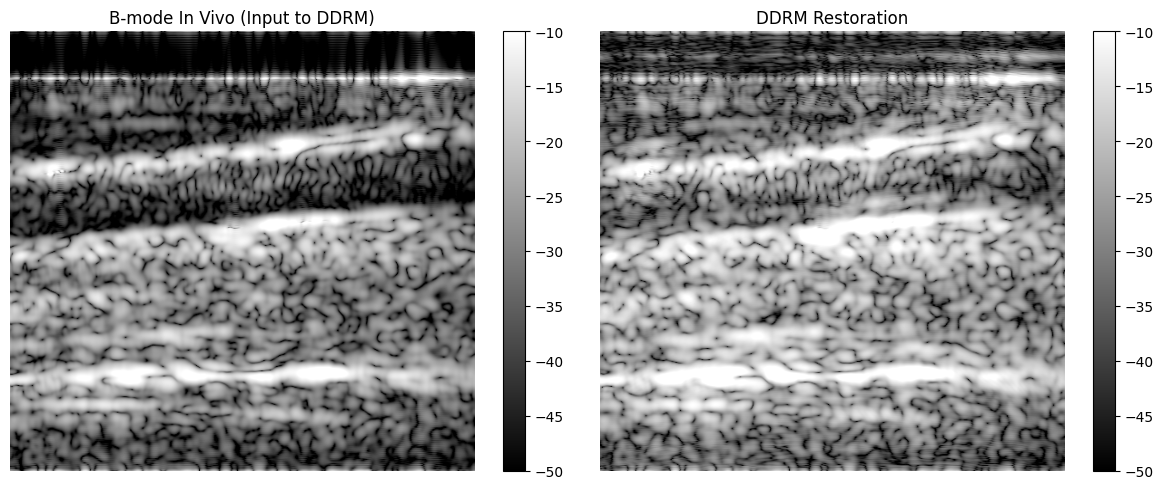

In [149]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# ─────────────── Load and Process RF Data ───────────────
data = scipy.io.loadmat('exp/datasets/Besson_Data/rf_resized_norm.mat')
rf = data['data'].astype(np.float64)

def bmode(rf_data):
    env = np.abs(hilbert(rf_data, axis=0))
    env = env / np.max(env)
    log_env = 20 * np.log10(env + 1e-6)
    return np.clip(log_env, -50, -10)

# Compute B-mode for original RF
bmode_rf = bmode(rf)

# ─────────────── Load and Process DDRM Result ───────────────
mat_res = scipy.io.loadmat('exp/image_samples/Besson/0_-1.mat')
img_res = mat_res['image']
if img_res.ndim == 3 and img_res.shape[0] in (1, 3):
    img_res = np.transpose(img_res, (1, 2, 0))
grayimage = np.mean(img_res, axis=2) if img_res.ndim == 3 else img_res

# Compute B-mode for DDRM-restored image
bmode_ddrm = bmode(grayimage)

# ─────────────── Plot Comparison ───────────────
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(bmode_rf, cmap='gray', aspect='auto')
plt.title('B-mode In Vivo (Input to DDRM)')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(bmode_ddrm, cmap='gray', aspect='auto')
plt.title('DDRM Restoration')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()
